Import thư viện 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tải dữ liệu từ github

In [10]:
import os
os.chdir('longmadlife')
!git clone https://github.com/longmadlife/longmadlife.git


Cloning into 'longmadlife'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 4), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


đọc dữ liệu

In [17]:
true = pd.read_csv("/content/longmadlife/True.csv") 
fake = pd.read_csv("/content/longmadlife/Fake.csv")

Gắn nhẵn cho bài báo

In [18]:
fake['label'] = '0'
true['label'] = '1'


Gộp 2 dataset true và fake thành 1 dataset 

In [19]:
news = pd.concat([fake, true]).reset_index(drop = True)
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Phân tích dữ liệu

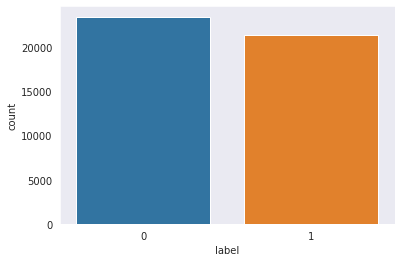

In [20]:
sns.set_style("dark")
sns.countplot(news.label)

In [21]:
news.label.value_counts()


0    23481
1    21417
Name: label, dtype: int64

Chia dataset thành 2 tập train và test 

In [22]:
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.label, test_size=0.2, random_state=0)


Huấn luyện mô hình

Logistic Regression Classifier



In [26]:

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)


Kết quả mô hình Logistic Regression

0.9874164810690423


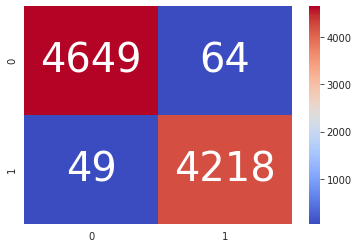

In [27]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True ,fmt='g', cmap='coolwarm', annot_kws={"size" :40})
acca = accuracy_score(y_test, pipe.predict(x_test))
print(acca)
plt.show()

In [28]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test, prediction))

accuracy: 98.74%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4713
           1       0.99      0.99      0.99      4267

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Suport Vector Machine Classifier


In [29]:

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)


Kết quả mô hình Support vector machine

0.9952115812917595


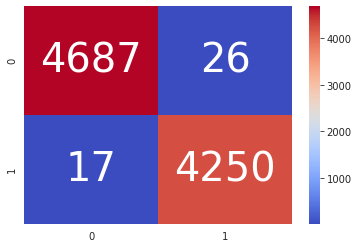

In [30]:

cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True ,fmt='g', cmap='coolwarm', annot_kws={"size" :40})
acca = accuracy_score(y_test, pipe.predict(x_test))
print(acca)
plt.show()

In [31]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test, prediction))

accuracy: 99.52%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4713
           1       0.99      1.00      0.99      4267

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

